# PLANEJAMENTO DA SOLUÇÃO

### Passo 1 - Escolha do Método

- Teste A/B: Avaliar os resultados do experimento realizado, ou seja, comparar as duas versões de preenchimento dos dados de cartão, para avaliar qual é mais eficaz (faz com que o usuário compre mais vezes).

### Passo 2 - Design de Experimento

#### Formação das hipóteses

- Hipótese Nula: Clientes que usam o método de preenchimento automatico(A) não fazem 2% mais compras do que o de clientes que usam o preenchimento manual(B).


- Hipótese Alternativa: O número de compras de clientes que usam o prenchimento automatico(A) é 2% maior do que o de clientes que usam o preenchimento manual(B).


- Tipo de teste:Maior -> Uma calda --> Unilateral.


- Nível de confiança: 90% (pode ser alterado, mas para o modelo de negócio 90% parece um nível ok)

#### Escolha da variável

- purchases (número de compras dos clientes).

#### Separação dos grupos

- Grupo controle: Grupo A = Preenchimento AUTOMÁTICO das informações de pagamento.


- Grupo tratamento: Grupo B = Preenchimento MANUAL das informações de pagamento.


- Tamanho da Amostra de cada grupo: Calcular levando em consideração nível de confiança, power e diferença esperada.


- Avaliação de homogeneidade entre os grupos:
  - Plotar os gráficos comparando diferentes categorias.
  - Avaliar o tempo.
  - Caso necessário filtrar com mais rigidez clientes homogêneos.
  - Pesquisar bibliotecas.

### Passo 3 - Coletando os dados

#### Coleta dos dados

Disponível em: https://drive.google.com/file/d/1oUJLeAgSaUI7CA-0F14KG0FzXEim7pSe/view

#### Preparação dos dados

- Fazer DATA DESCRIPTION e FEATURE ENGINEERING com os dados.

#### Métrica dos grupos

Cálculo do número de compras
- É necessário saber o número de compras baseline ou só com a diferença requerida do negócio é possível realizar o teste?
  - Como calcular o baseline do grupo de controle? 
  - Média por um período ou não é necessário? 

### Passo 4 - Testando as hipóteses

#### Definição do método de inferência estatística

Buscar fontes para saber qual dos testes usar ( proporção, conversão, volume ) ?
- t-Test
-ANOVA
- Chi-Squared

#### Cálculo do p-valor

### Passo 5 - Tirando conclusões

#### Resultados esperados

- Interpretação do p-valor
  - É maior ou menor que o alfa escolhido?


- Validação das hipóteses iniciais?
  - Hipotése rejeitada?


- Conclusão
  - O efeito da mudança foi provado ou não?


- Cálculo do número de vendas potencial


- Cálculo do faturamento potencial
  - Provavelmente --> Dada a mudança quanto vou ganhar a mais?


#### Possíveis ações

- Se for provado que o método de preenchimento automático faz com que a loja venda mais:
    - Provavelmente não faz sentido alterar todos os usuários para esse método
    - Incentivar usuários a usarem o método de preenchimento automático:
      - Oferecer % de cashback na compra para quem adicionar preenchimento automático
      - Vincular promoções de novos usuários a adição do método de preenchimento automático

# 0.5. IMPORTS

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


import pandas as pd
import numpy as np
import statsmodels.api as sm

from IPython.core.display import HTML

C:\Users\Miguel\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


## 0.5.1. Helper Functions

In [2]:
def jupyter_settings():
    %matplotlib inline
    #%pylab inline
    
    plt.style.use( 'ggplot' )
    plt.rcParams['figure.figsize'] = [16, 8]
    plt.rcParams['font.size'] = 24
    
    display(HTML ('<style>.container { width:95% !important; } </style>'))
    pd.options.display.max_columns = None
    pd.options.display.max_rows=50
    pd.set_option('display.expand_frame_repr', False)
       
    sns.set()
    
jupyter_settings()

## 0.2. Loading Data

In [3]:
data_raw = pd.read_csv('../datasets/ab_data_csv/ab_data.csv')

In [4]:
data_raw[~data_raw['user_id'].duplicated(keep=False)].sort_values('user_id')

,user_id,timestamp,group,landing_page,converted
63114,630000,2017-01-19 06:26:06.548941,treatment,new_page,0
103873,630001,2017-01-16 03:16:42.560309,treatment,new_page,1
205236,630002,2017-01-19 19:20:56.438330,control,old_page,0
247344,630003,2017-01-12 10:09:31.510471,treatment,new_page,0
242283,630004,2017-01-18 20:23:58.824994,treatment,new_page,0
...,...,...,...,...,...
274312,945994,2017-01-03 14:41:21.565258,control,old_page,0
275777,945996,2017-01-09 18:58:19.952277,treatment,new_page,0
109353,945997,2017-01-04 06:56:24.658147,control,old_page,0
241062,945998,2017-01-16 07:08:02.207969,control,old_page,0


0        2017-01-21 22:11:48.556739
1        2017-01-12 08:01:45.159739
2        2017-01-11 16:55:06.154213
3        2017-01-08 18:28:03.143765
4        2017-01-21 01:52:26.210827
                    ...            
294473   2017-01-03 22:28:38.630509
294474   2017-01-12 00:51:57.078372
294475   2017-01-22 11:45:03.439544
294476   2017-01-15 01:20:28.957438
294477   2017-01-16 12:40:24.467417
Name: timestamp, Length: 294478, dtype: datetime64[ns]

In [18]:
pd.to_datetime(data_raw['timestamp'].sort_values()).dt.date.unique()

array([datetime.date(2017, 1, 2), datetime.date(2017, 1, 3),
       datetime.date(2017, 1, 4), datetime.date(2017, 1, 5),
       datetime.date(2017, 1, 6), datetime.date(2017, 1, 7),
       datetime.date(2017, 1, 8), datetime.date(2017, 1, 9),
       datetime.date(2017, 1, 10), datetime.date(2017, 1, 11),
       datetime.date(2017, 1, 12), datetime.date(2017, 1, 13),
       datetime.date(2017, 1, 14), datetime.date(2017, 1, 15),
       datetime.date(2017, 1, 16), datetime.date(2017, 1, 17),
       datetime.date(2017, 1, 18), datetime.date(2017, 1, 19),
       datetime.date(2017, 1, 20), datetime.date(2017, 1, 21),
       datetime.date(2017, 1, 22), datetime.date(2017, 1, 23),
       datetime.date(2017, 1, 24)], dtype=object)

In [4]:
duplicateds = data_raw[data_raw['user_id'].duplicated(keep=False)].sort_values('user_id')
duplicateds

,user_id,timestamp,group,landing_page,converted
230259,630052,2017-01-17 01:16:05.208766,treatment,new_page,0
213114,630052,2017-01-07 12:25:54.089486,treatment,old_page,1
22513,630126,2017-01-14 13:35:54.778695,treatment,old_page,0
251762,630126,2017-01-19 17:16:00.280440,treatment,new_page,0
183371,630137,2017-01-20 02:08:49.893878,control,old_page,0
...,...,...,...,...,...
142354,945703,2017-01-08 19:40:51.169351,control,new_page,0
186960,945797,2017-01-13 17:23:21.750962,control,old_page,0
40370,945797,2017-01-11 03:04:49.433736,control,new_page,1
165143,945971,2017-01-16 10:09:18.383183,control,old_page,0


In [5]:
data_raw[(data_raw['group'] == 'control') & (data_raw['landing_page'] == 'new_page')]

,user_id,timestamp,group,landing_page,converted
22,767017,2017-01-12 22:58:14.991443,control,new_page,0
240,733976,2017-01-11 15:11:16.407599,control,new_page,0
490,808613,2017-01-10 21:44:01.292755,control,new_page,0
846,637639,2017-01-11 23:09:52.682329,control,new_page,1
850,793580,2017-01-08 03:25:33.723712,control,new_page,1
...,...,...,...,...,...
293894,741581,2017-01-09 20:49:03.391764,control,new_page,0
293996,942612,2017-01-08 13:52:28.182648,control,new_page,0
294200,928506,2017-01-13 21:32:10.491309,control,new_page,0
294253,886135,2017-01-06 12:49:20.509403,control,new_page,0


In [72]:
data_raw[(data_raw['group'] == 'treatment') & (data_raw['landing_page'] == 'old_page')]

,user_id,timestamp,group,landing_page,converted
308,857184,2017-01-20 07:34:59.832626,treatment,old_page,0
327,686623,2017-01-09 14:26:40.734775,treatment,old_page,0
357,856078,2017-01-12 12:29:30.354835,treatment,old_page,0
685,666385,2017-01-23 08:11:54.823806,treatment,old_page,0
713,748761,2017-01-10 15:47:44.445196,treatment,old_page,0
...,...,...,...,...,...
293773,688144,2017-01-16 20:34:50.450528,treatment,old_page,1
293817,876037,2017-01-17 16:15:08.957152,treatment,old_page,1
293917,738357,2017-01-05 15:37:55.729133,treatment,old_page,0
294014,813406,2017-01-09 06:25:33.223301,treatment,old_page,0


In [6]:
x = data_raw[(data_raw['group'] == 'control') & (data_raw['landing_page'] == 'new_page')]['user_id'].values
y = data_raw[(data_raw['group'] == 'treatment') & (data_raw['landing_page'] == 'old_page')]['user_id'].values
z = list(x) + list(y)

In [7]:
duplicateds[~duplicateds['user_id'].isin(z)]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


In [59]:
df_overview = data_raw[~data_raw['user_id'].duplicated(keep=False)].copy()

df_overview['date'] = pd.to_datetime(df_overview['timestamp']).dt.date

# Ordenando por data
df_overview = df_overview.sort_values('date')

# Quantidade no grupo por data
df_overview['accumulated_treatment'] = (df_overview['group'] == 'treatment').cumsum()
df_overview['accumulated_control'] = (df_overview['group'] == 'control').cumsum()

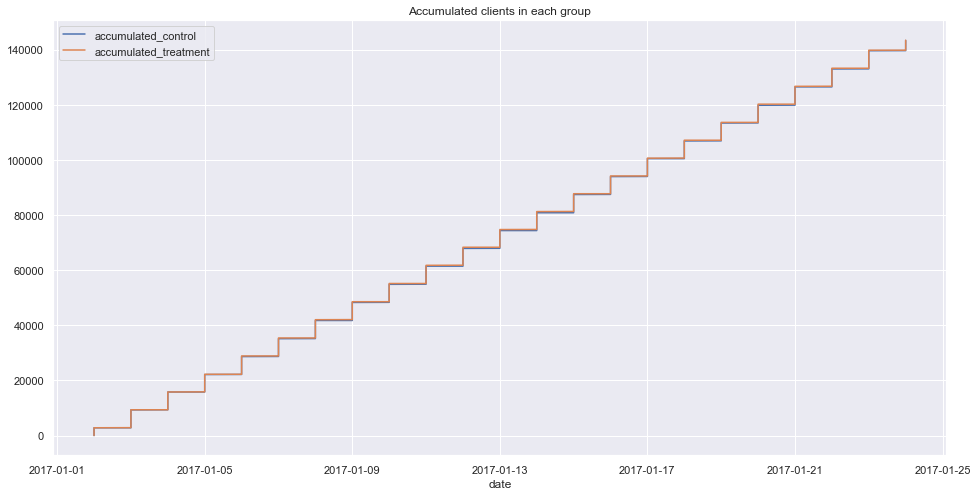

In [66]:
df_aux = df_overview.copy()

df_aux = df_aux.set_index('date', drop=True)

ax = df_aux.plot(y='accumulated_control', kind='line')
df_aux.plot(y='accumulated_treatment', kind='line', ax=ax).set_title('Accumulated clients in each group')
plt.show()

In [75]:
df_aux2 = df_overview[['group', 'date', 'converted']].groupby(['group', 'date']).mean().reset_index()
#df_aux2 = df_aux2.set_index('date', drop=True)

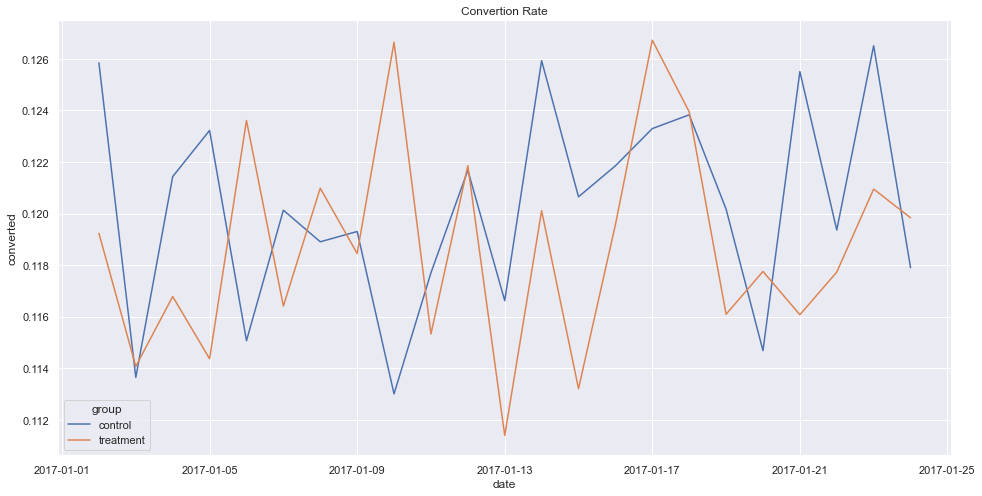

In [81]:
ax = sns.lineplot(data=df_aux2, x='date', hue='group', y='converted').set_title('Convertion Rate');

In [3]:
data_raw = pd.read_csv('../datasets/ab_testing.csv')

# 1.0. PASSO 01 - DATA DESCRIPTION

In [4]:
df1 = data_raw.copy()

## 1.1. Rename Columns

## 1.2. Data Dimensions

In [5]:
print(f'N rows: {df1.shape[0]}')
print(f'N columns: {df1.shape[1]}')

N rows: 45883
N columns: 8


## 1.3. Data Types

In [6]:
df1.dtypes

uid           int64
country      object
gender       object
spent         int64
purchases     int64
date         object
group        object
device       object
dtype: object

In [7]:
df1['date'] = pd.to_datetime(df1['date'])

## 1.4. Check NA

In [8]:
df1.isna().sum()

uid          0
country      0
gender       0
spent        0
purchases    0
date         0
group        0
device       0
dtype: int64

## 1.5. Fillout NA's

## 1.6. Verifying Types

## 1.7. Descriptive Statistics

In [9]:
num_attributes = df1.select_dtypes(include=['int64', 'float64']).drop(columns=['uid'])
cat_attributes = df1.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

### 1.7.1. Numerical Attributes

In [10]:
descriptive_num = num_attributes.describe().transpose()
descriptive_num['range'] = descriptive_num['max'] - descriptive_num['min']
descriptive_num['skew'] = num_attributes.skew()
descriptive_num['kurtosis'] = num_attributes.kurtosis()

descriptive_num = descriptive_num.rename(columns = {'50%':'median'})

descriptive_num = descriptive_num[['min', 'max','range','mean','median','std', 'skew', 'kurtosis']]
descriptive_num.round(1)

,min,max,range,mean,median,std,skew,kurtosis
spent,99.0,12170.0,12071.0,1883.5,1596.0,1363.9,1.4,2.6
purchases,1.0,30.0,29.0,4.5,4.0,3.1,1.3,2.6


### 1.7.1. Categorical Attributes

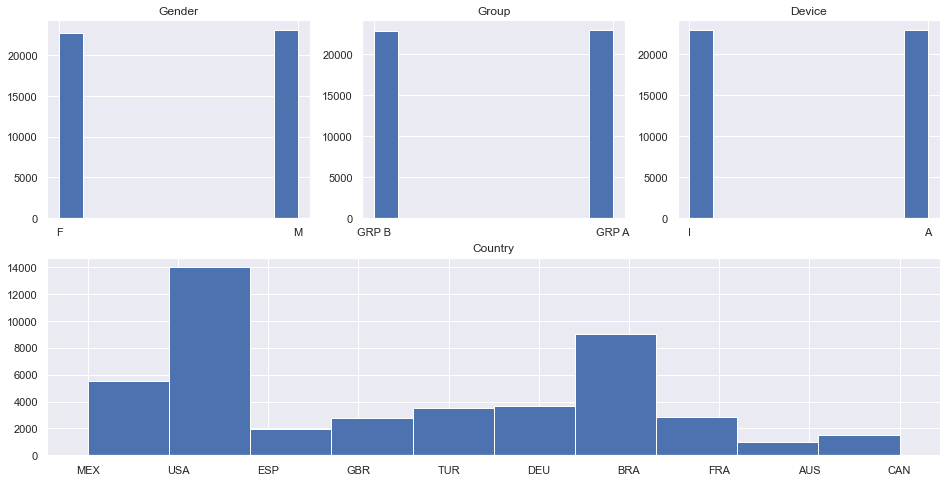

In [11]:
plt.subplot(2,3,1)
cat_attributes['gender'].hist().set_title('Gender')
plt.subplot(2,3,2)
cat_attributes['group'].hist().set_title('Group')
plt.subplot(2,3,3)
cat_attributes['device'].hist().set_title('Device')

plt.subplot(2,3,(4,6))
cat_attributes['country'].hist().set_title('Country')

plt.show()

# 2.0. PASSO 02 - FEATURE ENGINEERING

In [12]:
df2 = df1.copy()

## 2.1. Mapa Mental de Hipoteses

## 2.2. Criacao das Hipoteses

### 2.1.1. Hipoteses Loja

### 2.1.2. Hipoteses Produto

### 2.1.3. Hipoteses Tempo

## 2.3. Lista final de hipoteses
--> Selecionando as hipoteses que posso validar com os dados nesse momento

## 2.4. Feature Engineering

In [13]:
# Criação da variável principal
df2['ticket'] = df2['spent'] / df2['purchases']

In [14]:
# Ordenando por data
df2 = df2.sort_values('date')

In [15]:
# Quantidade no grupo por data
df2['accumulated_groupA'] = (df2['group'] == 'GRP A').cumsum()
df2['accumulated_groupB'] = (df2['group'] == 'GRP B').cumsum()

# 3.0. PASSO 03 - FILTRAGEM DE VARIAVEIS

In [16]:
df3 = df2.copy()

## 3.1. Filtragem das Linhas

## 3.2. Filtragem das Colunas

# 4.0. PASSO 04 - ANALISE EXPLORATORIA DOS DADOS

In [17]:
df4 = df3.copy()

## 4.1. Analise Univariada

### 4.1.1. Response Variable

### 4.1.2. Numerical Variable

### 4.1.3. Categorical Variable

## 4.2. Analise Bivariada

### Distribuições de purchases por grupo

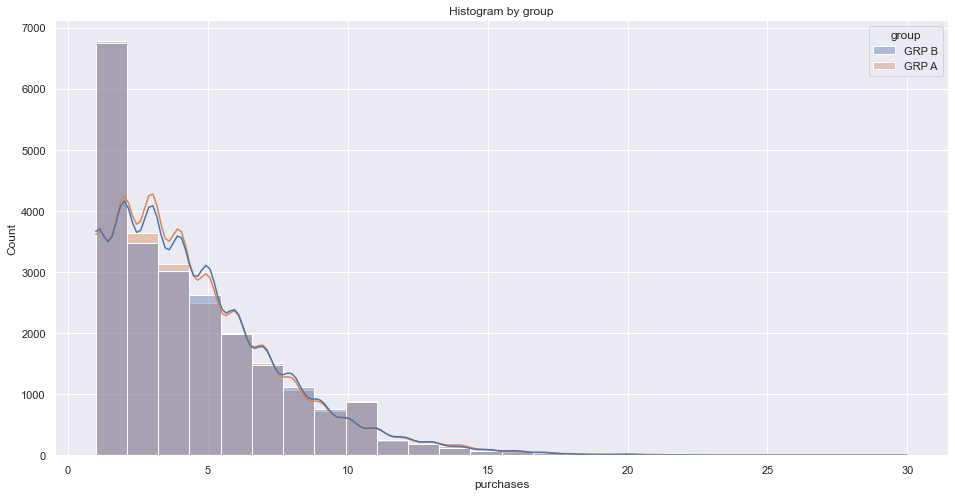

In [18]:
sns.histplot(df4,
             x='purchases',
             hue='group',
             bins=len(df4['purchases'].unique()),
             kde=True,
             alpha=0.4,
             palette='deep').set_title('Histogram by group');

###  Quantidade total de clientes em cada grupo por Data

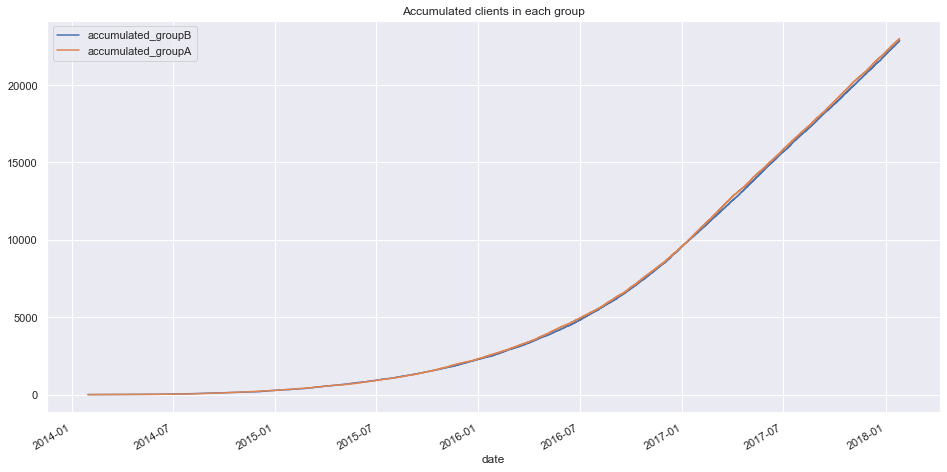

In [28]:
df_aux = df4.copy()
df_aux = df_aux.set_index('date', drop=True)

ax = df_aux.plot(y='accumulated_groupB', kind='line')
df_aux.plot(y='accumulated_groupA', kind='line', ax=ax).set_title('Accumulated clients in each group')
plt.show()

In [ ]:
.set_title('Mean Purchases')

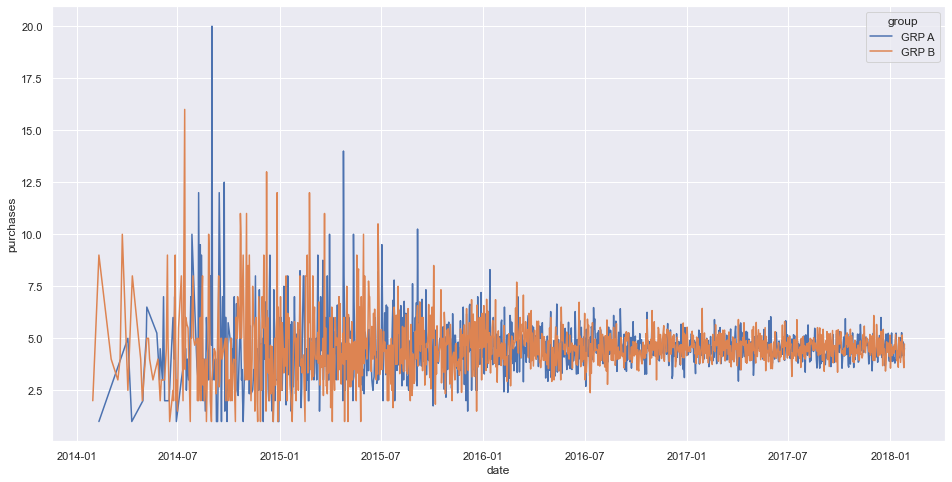

In [53]:
df_aux2 = df4[['group', 'date', 'purchases']].groupby(['group', 'date']).mean().reset_index()
ax = sns.lineplot(data=df_aux2, x='date', hue='group', y='purchases')

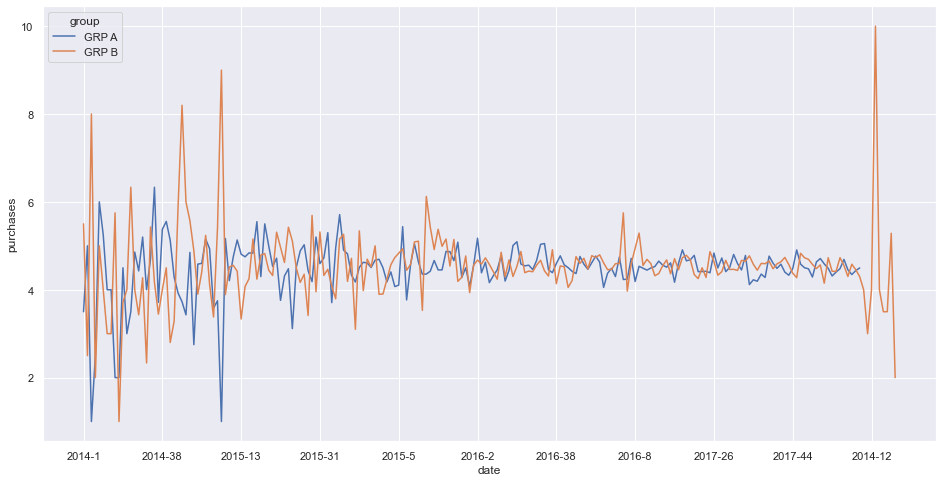

In [51]:
df_aux2 = df4.copy()
df_aux2['date'] = (df_aux2['date'].dt.year).astype(str) +  '-' + (df_aux2['date'].dt.isocalendar().week).astype(str)
df_aux2 = df_aux2[['group', 'date', 'purchases']].groupby(['group', 'date']).mean().reset_index()
ax = sns.lineplot(data=df_aux2, x='date', hue='group', y='purchases')
ax.xaxis.set_major_locator(ticker.MultipleLocator(20));

### Clientes em cada grupo por Categorias

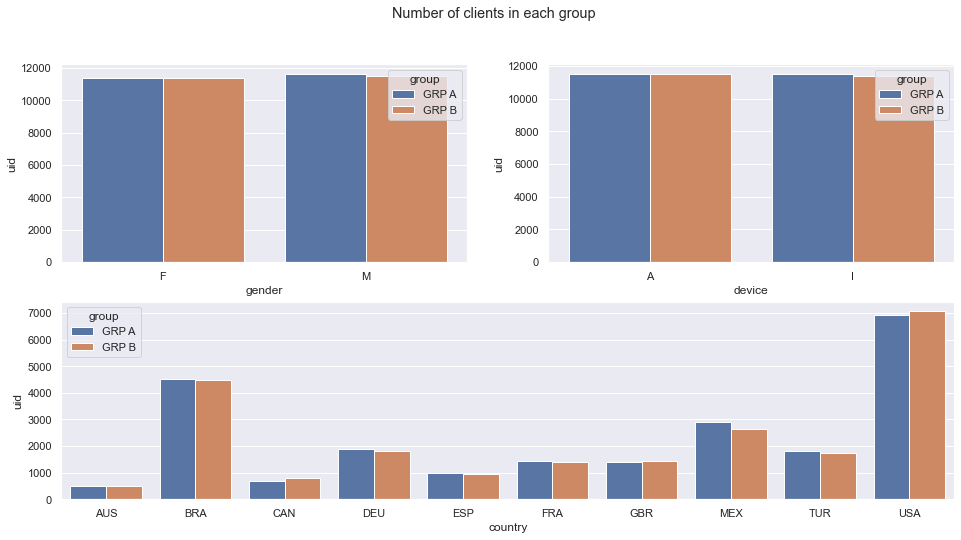

In [20]:
plt.suptitle('Number of clients in each group') 

plt.subplot(2,2,1)
coluna = 'gender'
df_aux = df4.groupby(['group', coluna]).count().reset_index()
sns.barplot(data=df_aux, y='uid', x=coluna, hue='group')

plt.subplot(2,2,2)
coluna = 'device'
df_aux = df4.groupby(['group', coluna]).count().reset_index()
sns.barplot(data=df_aux, y='uid', x=coluna, hue='group')

plt.subplot(2,2,(3,4))
coluna = 'country'
df_aux = df4.groupby(['group', coluna]).count().reset_index()
sns.barplot(data=df_aux, y='uid', x=coluna, hue='group')

plt.show()

### Gasto médio em cada grupo por Categorias

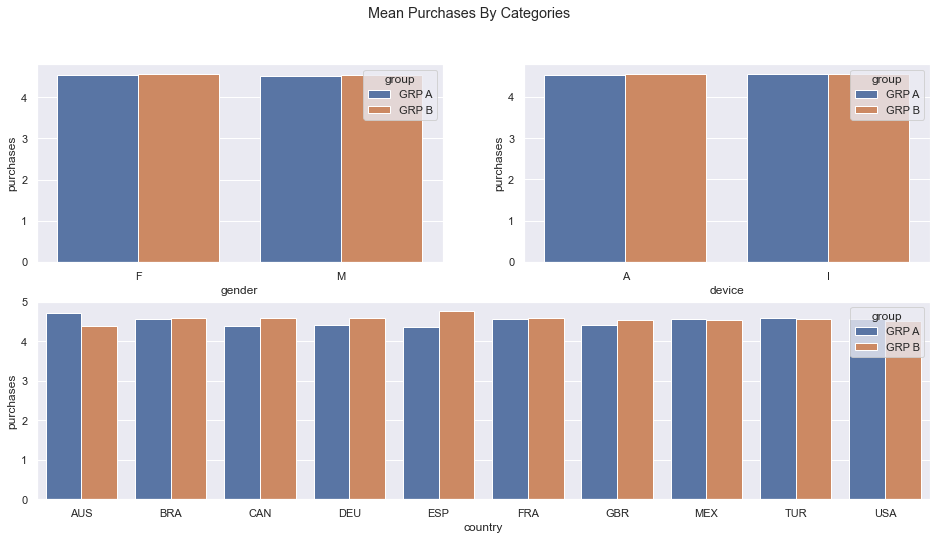

In [21]:
plt.suptitle('Mean Purchases By Categories') 

plt.subplot(2,2,1)
coluna = 'gender'
df_aux = df4.groupby(['group', coluna]).mean().reset_index()
sns.barplot(data=df_aux, y='purchases', x=coluna, hue='group')

plt.subplot(2,2,2)
coluna = 'device'
df_aux = df4.groupby(['group', coluna]).mean().reset_index()
sns.barplot(data=df_aux, y='purchases', x=coluna, hue='group')

plt.subplot(2,2,(3,4))
coluna = 'country'
df_aux = df4.groupby(['group', coluna]).mean().reset_index()
sns.barplot(data=df_aux, y='purchases', x=coluna, hue='group')

plt.show()

### 4.2.1. Resumo das Hipoteses

## 4.3. Analise Multivariada

### 4.3.1. Numerical Attributes

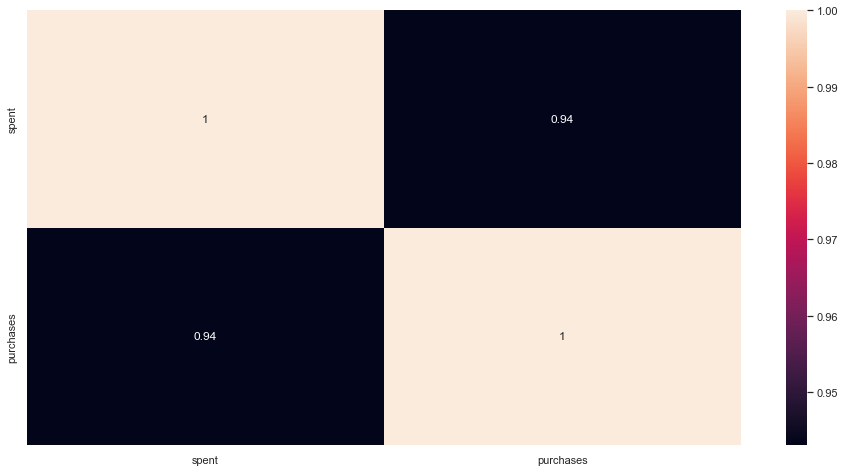

In [22]:
correlation = num_attributes.corr(method='pearson')
sns.heatmap(correlation, annot=True);

### 4.3.2. Categorical Attributes

# 5.0. PASSO 05 - PREPARAÇAO DOS DADOS

In [23]:

effect_size = sm.stats.proportion_effectsize( 1010, 1000 )
effect_size

analysis = sm.stats.TTestIndPower()

# O tamanho da amostra ?
# Effect Size é de 6% de diferença das conversão entre as amostras.
# A signficancia estatistica é de 95% no Teste T de proporcao - 5%
# A probabilidade de observar o efeito na amostra é de 80% ( padrão da literatura )

results = analysis.solve_power( effect_size=effect_size,
                                alpha=0.05,
                                power=0.8, 
                                alternative='larger' )

C:\Users\Miguel\anaconda3\lib\site-packages\statsmodels\stats\proportion.py:428: RuntimeWarning: invalid value encountered in arcsin
  es = 2 * (np.arcsin(np.sqrt(prop1)) - np.arcsin(np.sqrt(prop2)))
C:\Users\Miguel\anaconda3\lib\site-packages\statsmodels\stats\power.py:415: ConvergenceWarning: 
Failed to converge on a solution.

  warnings.warn(convergence_doc, ConvergenceWarning)


In [24]:
effect_size = sm.stats.proportion_effectsize( 0.11, 0.10 )
effect_size

0.03262940076737697

In [25]:
analysis = sm.stats.TTestIndPower()

TypeError: object of type 'NoneType' has no len()

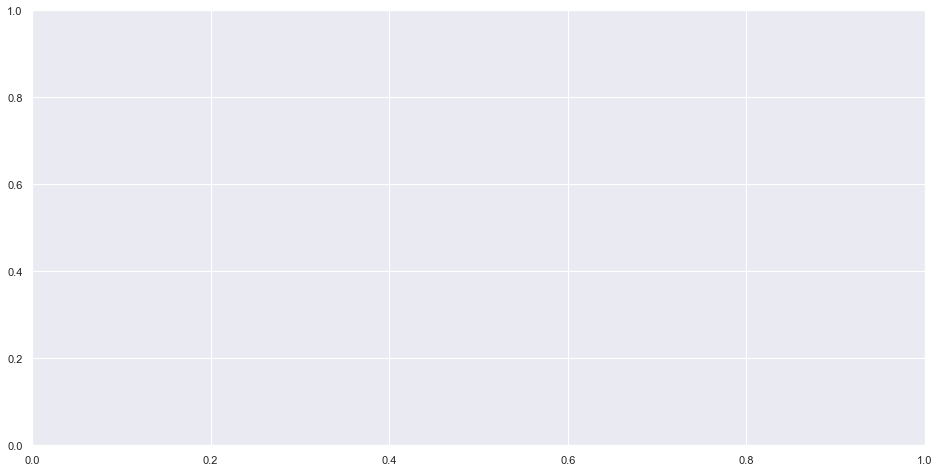

In [26]:
analysis.plot_power(dep_var='nobs')

In [ ]:
import scipy.stats as stats

In [ ]:
A = df4.loc[df4['group'] == 'GRP A', 'purchases'].values
B = df4.loc[df4['group'] == 'GRP B', 'purchases'].values

In [ ]:
pvalue = stats.mannwhitneyu(A, B)[1]

In [ ]:
pvalue

# 6.0. PASSO 06 - FEATURE SELECTION

## 6.1. Split dataframe into training and test

## 6.2. Feature Selection

# 7.0. PASSO 07 - MACHINE LEARNING MODELLING

## 7.6. Compare Model's Performance

### 7.6.1. Single Performance

### 7.6.1. Real Performance - Cross Validation

# 8.0. PASSO 08 - HYPERPARAMETER FINE TUNING

# 9.0. PASSO 09 - TRADUCAO E INTERPRETACAO DO ERRO

## 9.1. Business Performance

## 9.2. Total Performance

## 9.3. Machine Learning Performance

# 10.0. PASSO 10 - DEPLOY MODEL